## Data Analysis Process

1. Asking Questions
2. Data Wrangling<br>
    a. Gathering Data 
        - i. CSV files 
        - ii. APIs 
        - iii. Web Scraping 
        - iv. Databases 
    b. Assessing Data<br>
    c. Cleaning Data
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results

### Summary of today's session

- You have to become Sherlock
- Will try to create a framework
- Frameworks may vary
- The goal is to give you idea

### 1. Data Wrangling

- Data Gathering
- Data Accessing
- Data Cleaning

### 1b. Data Accessing

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.


Types of Unclean Data
There are 2 kinds of unclean data


- Dirty Data (Data with Quality issues): Dirty data, also known as low quality data. Low quality data has content issues.

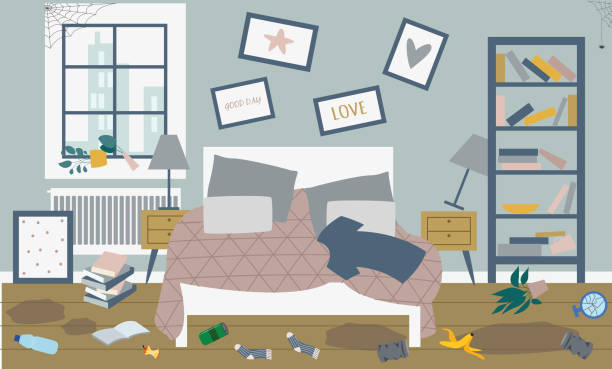

Duplicated data
Missing Data
Corrupt Data
Inaccurate Data

- Messy Data (Data with tidiness issues): Messy data, also known as untidy data. Untidy data has structural issues.Tidy data has the following properties:

Each variable forms a column
Each observation forms a row
Each observational unit forms a table

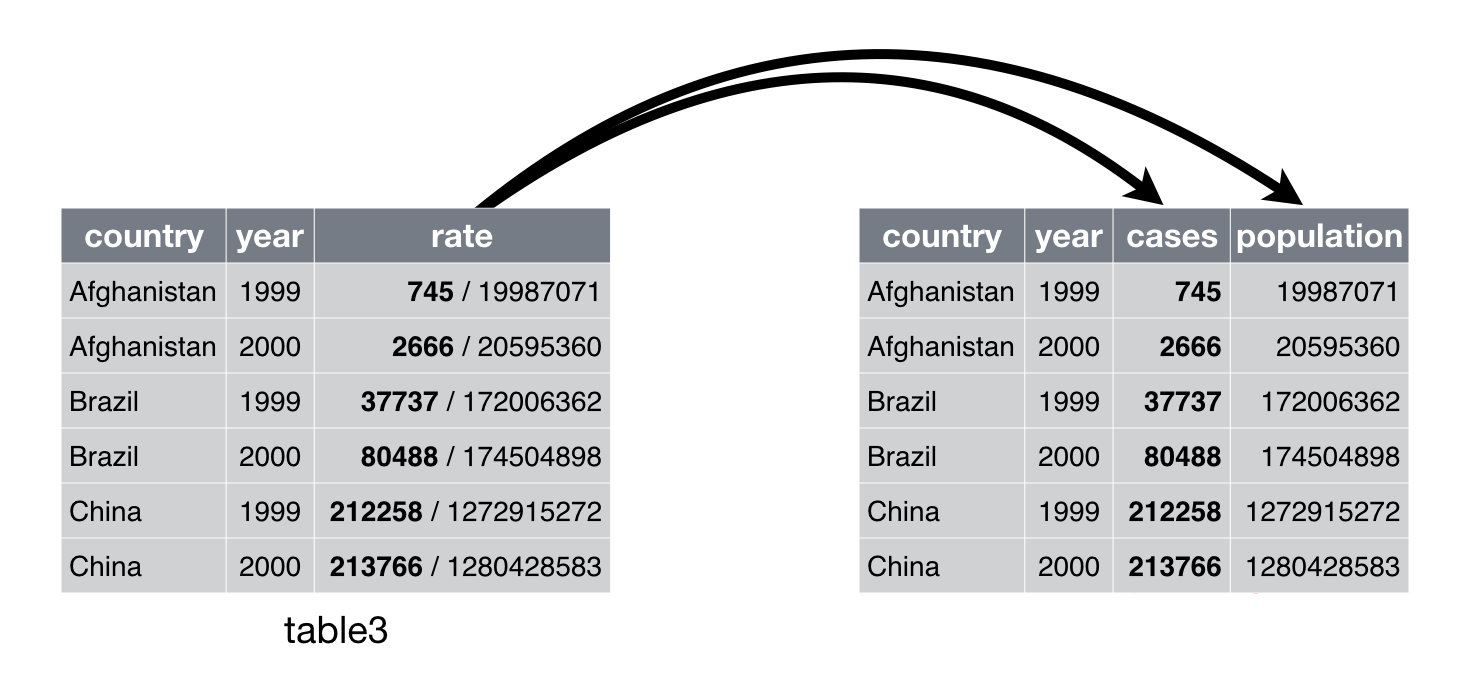

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
treatment = pd.read_csv(r'D:\practice languages\python\ds cx\data wrangling\treatments.csv')
patients = pd.read_csv(r'D:\practice languages\python\ds cx\data wrangling\patients.csv')
treatment_cuts= pd.read_csv(r'D:\practice languages\python\ds cx\data wrangling\treatments_cut.csv')
adverse_rxn= pd.read_csv(r'D:\practice languages\python\ds cx\data wrangling\adverse_reactions.csv')

In [3]:
# viewing the data
treatment.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [7]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [8]:
treatment_cuts.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN
3,thể,lương,-,61u - 64u,7.64,7.22,0.92
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38


In [9]:
adverse_rxn.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


### 1. Write a summary for your data

This is a dataset about 500 patients of which 350 patients participated in a clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After 4 weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

Data about patients feeling some adverse effects is also recorded.

### 2. Write Column descriptions

#### **Table** -> `patients`:

- `patient_id`: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin
- `assigned_sex`: the assigned sex of each patient at birth (male or female)
- `given_name`: the given name (i.e. first name) of each patient
- `surname`: the surname (i.e. last name) of each patient
- `address`: the main address for each patient
- `city`: the corresponding city for the main address of each patient
- `state`: the corresponding state for the main address of each patient
- `zip_code`: the corresponding zip code for the main address of each patient
- `country`: the corresponding country for the main address of each patient (all United states for this clinical trial)
- `contact`: phone number and email information for each patient
- `birthdate`: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
- `weight`: the weight of each patient in pounds (lbs)
- `height`: the height of each patient in inches (in)
- `bmi`: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

#### **Table** -> `treatments` and `treatment_cut`:

- `given_name`: the given name of each patient in the Master Patient Index that took part in the clinical trial
- `surname`: the surname of each patient in the Master Patient Index that took part in the clinical trial
- `auralin`: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.
- `novodra`: same as above, except for patients that continued treatment with Novodra
- `hba1c_start`: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- `hba1c_end`: the patient's HbA1c level at the end of the last week of treatment
- `hba1c_change`: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

### 3. Add any additional information

Additional useful information:

- Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.

### Types of Assessment
There are 2 types of assessment styles

- `Manual` - Looking through the data manually in google sheets
- `Programmatic` - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment
There are 2 steps involved in Assessment

- Discover
- Document

In [11]:
# export data for manual assessment

with pd.ExcelWriter('clinical_trials.xlsx') as writer:
  patients.to_excel(writer,sheet_name='patients')
  treatment.to_excel(writer,sheet_name='treatments')
  treatment_cuts.to_excel(writer,sheet_name='treatment_cut')
  adverse_rxn.to_excel(writer,sheet_name='adverse_reactions')

### Issues with the dataset

1. Dirty Data

  Table - `Patients`

    - patient_id = 9 has misspelled name 'Dsvid' instead of David `accuracy`
    - state col sometimes contain full name and some times abbrivietation `consistency`
    - zip code col has entries with 4 digit `validity`
    - data missing for 12 patients in address,city,	state,zip_code	,country,	contact `completion`
    - incorrect data type assigned to sex, zip code, birthdate `validity`
    - duplicate entries by the name of John Doe `accuracy`
    - one patient has weight = 48 pounds `accuracy`
    - one patient has height = 27 inches `accuracy`

  Table - `Treatments` & `Treatments_cut`

    - given_name and surname col is is all lower case `consistency`
    - remove u from Auralin and Novadra cols `validity`
    - '-' in novadra and Auralin col treated as nan `validity`
    - missing values in hba1c_change col `completion`
    - 1 duplicate entry by the name Joseph day `accuracy`
    - in hba1c_change 9 instead of 4 `accuracy`

  Table - `Adverse_reactions`

    - given_name and surname are all in lower case `consistency`

2. Messy Data

  Table - `Patients`

    - contact col contains both phone and email

  Table - `Treatments` & `Treatments_cut`

    - Auralin and Novadra col should be split into 2 cols start and end dose
    - merge both the tables

  Table - `Adverse_reactions`

    - This table should not exist independently

### Automatic Assessment

- head and tail
- sample
- info
- isnull
- duplicated
- describe

In [4]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [5]:
patients[patients.duplicated(subset=['given_name', 'surname'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [6]:
treatment[treatment.duplicated(subset=['given_name' ,'surname'])]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [7]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [8]:
patients[patients['weight']==48.800000]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [36]:
treatment.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


`NOTE`  - Assessing data is and iterative process

### Data Quality Dimensions

- Completeness -> is data missing?
- Validity -> is data invalid -> negative height -> duplicate patient id
- Accuracy -> data is valid but not accurate -> weight -> 1kg
- Consistency -> both valid and accurate but written differently -> New Youk and NY

### Order of severity

Completeness <- Validity <- Accuracy <- Consistency

### Data Cleaning Order

1. Quality -> Completeness
2. Tidiness
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality -> Consistency

#### Steps involved in Data cleaning
- Define
- Code
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [15]:
patients_df = patients.copy()
treatment_df = treatment.copy()
treatment_cuts_df = treatment_cuts.copy()
adverse_rxn_df = adverse_rxn.copy()

- Solving the completion issues 

    ` missing data in patients df `

    ` missing data in treatment and treatment cut df in hba1c_change` 

In [ ]:
# code 
patients_df.fillna('no data', inplace= True)

C:\Users\ieish\AppData\Local\Temp\ipykernel_26844\1652353233.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no data' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  patients_df.fillna('no data', inplace= True)


In [ ]:
# test
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       503 non-null    object 
 5   city          503 non-null    object 
 6   state         503 non-null    object 
 7   zip_code      503 non-null    object 
 8   country       503 non-null    object 
 9   contact       503 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 55.1+ KB


In [ ]:
# code 
treatment_df['hba1c_change']= treatment_df['hba1c_start'] - treatment_df['hba1c_end']
treatment_cuts_df['hba1c_change']= treatment_cuts_df['hba1c_start'] - treatment_cuts_df['hba1c_end']

In [ ]:
# test 
treatment_df
treatment_cuts_df

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,0.40
2,alwin,svensson,36u - 39u,-,7.78,7.34,0.44
3,thể,lương,-,61u - 64u,7.64,7.22,0.42
4,amanda,ribeiro,36u - 44u,-,7.85,7.47,0.38
...,...,...,...,...,...,...,...
65,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
66,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.45
67,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
68,berta,napolitani,-,42u - 44u,7.68,7.21,0.47


- now we will move to tidiness issue 

   ` in patients table we use regex module to saperate the columns of phone number and email `

# that's it on this confusing dataset 